# Occupation Prediction Model
This is a model which I made in an AI/ML workshop

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [81]:
df = pd.read_csv("archive/bank_data.csv")
X = df.drop(columns=["CustomerOccupation"])
y = df["CustomerOccupation"]

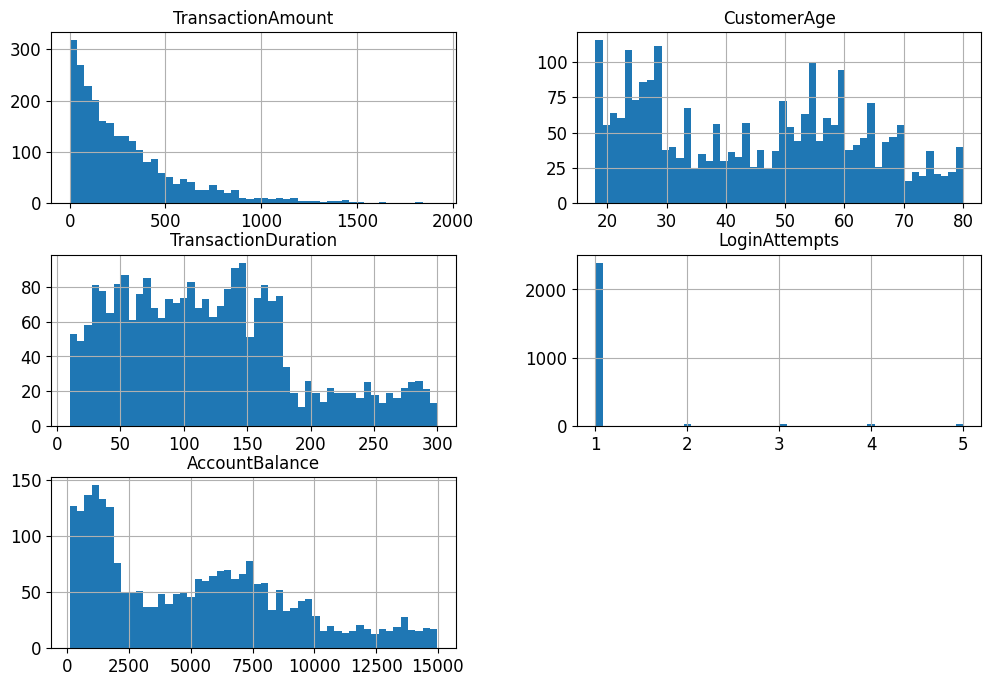

In [82]:
X.hist(bins=50, figsize=(12,8))
plt.rc("font", size=12)
plt.rc("axes", titlesize=12, labelsize=12)
plt.rc("xtick", labelsize=12)
plt.show()

In [83]:
# occupations = np.unique(y)
# occupation_map = {v:i for i,v in enumerate(occupations)} # creates an occupation map like Doctor -> 0, Teacher -> 1 (the map may not be like this exactly). I will use it for target names for classification_report

num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

In [84]:
scaler = StandardScaler()

X = pd.get_dummies(X, columns=cat_cols)
X[num_cols] = scaler.fit_transform(X[num_cols])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # I just discovered default is 25%

In [86]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
y_pred = model.predict(X_test) # here I accidentally discovered I don't need to process string classes to integers in scikit-learn, it does it under the hood in classification algorithms

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Doctor       0.79      0.65      0.71       133
    Engineer       0.71      0.73      0.72       166
     Retired       0.76      0.87      0.81       150
     Student       0.99      0.96      0.97       179

    accuracy                           0.81       628
   macro avg       0.81      0.80      0.80       628
weighted avg       0.82      0.81      0.81       628

